# KB Mirrors

This example simulates the alignment of a KB mirror endstation (with four degrees of freedom).

In [1]:
from blop.utils import prepare_re_env  # noqa

%run -i $prepare_re_env.__file__ --db-type=temp
bec.disable_plots()

In [2]:
from blop.sim import Beamline

beamline = Beamline(name="bl")

In [3]:
from blop import DOF, Agent, Objective
from blop.digestion import beam_stats_digestion

dofs = [
    DOF(description="KBV downstream", device=beamline.kbv_dsv, search_domain=(-5.0, 5.0)),
    DOF(description="KBV upstream", device=beamline.kbv_usv, search_domain=(-5.0, 5.0)),
    DOF(description="KBH downstream", device=beamline.kbh_dsh, search_domain=(-5.0, 5.0)),
    DOF(description="KBH upstream", device=beamline.kbh_ush, search_domain=(-5.0, 5.0)),
]

objectives = [
    Objective(name="bl_det_sum", target="max", transform="log", trust_domain=(200, np.inf)),
    Objective(name="bl_det_wid_x", target="min", transform="log", latent_groups=[("bl_kbh_dsh", "bl_kbh_ush")]),
    Objective(name="bl_det_wid_y", target="min", transform="log", latent_groups=[("bl_kbv_dsv", "bl_kbv_usv")]),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    detectors=[beamline.det],
    digestion=beam_stats_digestion,
    digestion_kwargs={"image_key": "bl_det_image"},
    verbose=True,
    db=db,
    tolerate_acquisition_errors=False,
    enforce_all_objectives_valid=True,
    train_every=3,
)

(uid,) = RE(agent.learn("qr", n=32))

2025-06-19 02:06:42.050 INFO: Executing plan <generator object Agent.learn at 0x7fb32c0cc6d0>


2025-06-19 02:06:42.052 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fb32d10e980> from 'idle' -> 'running'


2025-06-19 02:06:42.054 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-06-19 02:06:42

Persistent Unique Scan ID: '6cd9d2af-1c2a-4408-8285-f75334035331'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 02:06:42.3 |      2.511 |     -3.387 |      1.962 |      0.359 |    156.131 |      167.231 |       84.026 |       36.605 |       17.814 |

|         2 | 02:06:42.4 |      1.348 |     -3.868 |      4.203 |     -1.508 |     53.676 |      106.290 |       97.408 |       12.967 |       41.351 |

|         3 | 02:06:42.4 |     -4.886 |     -2.000 |      4.979 |      2.607 |     57.720 |      162.841 |      179.112 |      104.389 |       76.069 |

|         4 | 02:06:42.5 |     -1.956 |      1.628 |      2.404 |      3.146 |    406.806 |      213.958 |      199.923 |      116.838 |       41.066 |

|         5 | 02:06:42.5 |     -2.995 |      2.640 |      0.281 |      4.872 |     97.286 |      265.308 |      214.923 |       60.132 |       16.068 |

|         6 | 02:06:42.6 |     -0.766 |      3.719 |     -0.955 |      2.275 |    449.478 |      263.471 |      214.074 |       18.371 |       17.342 |

|         7 | 02:06:42.6 |      3.142 |      3.147 |     -4.358 |      3.671 |     -1.654 |      196.364 |      164.703 |      360.435 |      246.937 |

|         8 | 02:06:42.7 |      1.827 |      2.293 |     -3.328 |      4.445 |      0.288 |      204.366 |      153.467 |      374.514 |      269.667 |

|         9 | 02:06:42.8 |      3.820 |     -1.257 |     -0.929 |      3.905 |    132.903 |      282.101 |       77.785 |       29.783 |        6.709 |

|        10 | 02:06:42.8 |      1.228 |     -2.894 |     -1.776 |      3.116 |    216.947 |      292.518 |      101.277 |       11.418 |       48.246 |

|        11 | 02:06:42.9 |      2.461 |     -2.365 |      0.333 |      1.445 |    304.161 |      221.049 |       86.309 |       25.983 |       21.818 |

|        12 | 02:06:42.9 |     -0.143 |     -3.479 |      2.726 |      4.318 |    177.022 |      218.103 |      112.833 |      132.784 |       68.551 |

|        13 | 02:06:43.0 |     -2.447 |     -4.379 |     -0.123 |     -0.306 |     78.014 |      195.667 |      142.321 |       39.040 |      121.525 |

|        14 | 02:06:43.0 |     -3.811 |     -4.248 |      1.109 |     -2.544 |     47.951 |      130.649 |      147.596 |       55.042 |      130.309 |

|        15 | 02:06:43.1 |     -3.132 |      1.099 |      3.912 |     -4.968 |      3.756 |      197.489 |      165.100 |      372.892 |      227.515 |

|        16 | 02:06:43.2 |     -1.819 |      4.615 |      3.696 |     -3.246 |      3.432 |      207.123 |      151.355 |      376.800 |      236.578 |

|        17 | 02:06:43.2 |     -1.217 |     -0.254 |      1.518 |     -4.260 |    162.070 |      119.536 |      163.355 |       36.645 |       65.672 |

|        18 | 02:06:43.3 |      3.006 |      0.587 |     -0.493 |     -3.687 |    342.528 |      155.143 |      112.646 |      100.604 |       32.389 |

|        19 | 02:06:43.3 |      1.965 |      3.955 |     -2.115 |     -4.465 |    167.783 |      171.256 |      179.002 |      129.011 |       66.405 |

|        20 | 02:06:43.4 |      4.277 |      4.750 |      1.617 |     -2.057 |    165.755 |      125.680 |      154.975 |       40.566 |      119.026 |

|        21 | 02:06:43.4 |      3.624 |     -0.360 |      3.170 |     -0.417 |    482.193 |      128.267 |       89.883 |       47.897 |       25.953 |

|        22 | 02:06:43.5 |      4.453 |      1.487 |      2.908 |      2.157 |    339.286 |      183.651 |      110.099 |      104.293 |       64.336 |

|        23 | 02:06:43.6 |      0.597 |      2.975 |      4.406 |      1.056 |    376.504 |      148.472 |      184.664 |       88.466 |       32.412 |

|        24 | 02:06:43.6 |      0.772 |      0.767 |      0.776 |     -0.961 |    548.118 |      164.458 |      148.986 |       35.400 |       12.279 |

|        25 | 02:06:43.7 |     -4.264 |      2.072 |     -1.360 |      0.877 |    145.202 |      243.833 |      209.908 |       40.486 |       25.124 |

|        26 | 02:06:43.7 |     -4.439 |      4.161 |     -2.573 |     -0.856 |     -1.860 |      184.000 |      141.411 |      338.000 |      244.679 |

|        27 | 02:06:43.8 |     -3.618 |     -2.721 |     -3.537 |      1.581 |     49.221 |      277.075 |      162.426 |       38.536 |      109.262 |

|        28 | 02:06:43.8 |     -1.334 |     -1.859 |     -3.758 |      0.168 |    233.123 |      254.154 |      141.460 |       79.912 |       98.141 |

|        29 | 02:06:43.9 |     -2.505 |     -1.021 |     -2.250 |     -1.715 |    263.806 |      208.679 |      168.241 |      109.842 |       95.182 |

|        30 | 02:06:43.9 |      0.154 |     -0.845 |     -3.062 |     -2.983 |    168.354 |      201.778 |      133.505 |      150.471 |       50.156 |

|        31 | 02:06:44.0 |     -0.590 |      0.028 |     -4.820 |     -2.260 |    212.846 |      222.323 |      158.976 |      137.862 |       48.798 |

|        32 | 02:06:44.1 |      4.894 |     -4.986 |     -4.565 |     -3.766 |      6.208 |      195.835 |      154.856 |      330.136 |      267.951 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['6cd9d2af'] (scan num: 1)

/opt/hostedtoolcache/Python/3.10.17/x64/lib/python3.10/site-packages/botorch/fit.py:215: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL: 
  result = optimizer(mll, closure=closure, **optimizer_kwargs)


2025-06-19 02:06:46.426 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fb32d10e980> from 'running' -> 'idle'


2025-06-19 02:06:46.427 INFO: Cleaned up from plan <generator object Agent.learn at 0x7fb32c0cc6d0>


In [4]:
RE(agent.learn("qei", n=4, iterations=4))

2025-06-19 02:06:46.434 INFO: Executing plan <generator object Agent.learn at 0x7fb328bf3140>


2025-06-19 02:06:46.436 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fb32d10e980> from 'idle' -> 'running'


2025-06-19 02:06:46.437 INFO: running iteration 1 / 4




Transient Scan ID: 2     Time: 2025-06-19 02:06:47

Persistent Unique Scan ID: '773fa947-ff83-488a-b13e-5e22ee107992'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 02:06:47.7 |      1.522 |      0.537 |     -0.276 |      1.066 |    549.628 |      225.921 |      134.059 |       17.308 |        8.776 |

|         2 | 02:06:47.8 |      0.836 |      0.916 |     -0.130 |      1.095 |    551.111 |      223.431 |      150.113 |       16.393 |       10.182 |

|         3 | 02:06:47.8 |      0.654 |      0.632 |      1.835 |     -0.660 |    552.998 |      149.076 |      148.569 |       17.266 |       16.432 |

|         4 | 02:06:47.9 |      1.122 |      2.599 |      2.397 |      1.637 |    504.901 |      183.848 |      171.051 |       79.789 |       34.657 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['773fa947'] (scan num: 2)

2025-06-19 02:06:49.357 INFO: running iteration 2 / 4




Transient Scan ID: 3     Time: 2025-06-19 02:06:50

Persistent Unique Scan ID: '0826dc51-7f1b-456b-a8c7-0bcbf3332951'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 02:06:50.7 |      1.969 |      1.170 |      2.008 |     -1.131 |    543.691 |      136.479 |      137.033 |       16.617 |       24.187 |

|         2 | 02:06:50.7 |      1.778 |      1.650 |      1.650 |      1.235 |    535.666 |      190.714 |      147.042 |       52.475 |       29.431 |

|         3 | 02:06:50.8 |      1.618 |      0.438 |      0.349 |      0.798 |    542.813 |      208.000 |      131.285 |       16.900 |        9.004 |

|         4 | 02:06:50.8 |      1.448 |      0.616 |     -0.427 |      1.549 |    551.064 |      238.500 |      136.585 |       16.478 |        9.129 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['0826dc51'] (scan num: 3)

2025-06-19 02:06:52.000 INFO: running iteration 3 / 4




Transient Scan ID: 4     Time: 2025-06-19 02:06:53

Persistent Unique Scan ID: 'f2428fce-159b-434a-b011-aa7317641a3f'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 02:06:53.6 |      0.199 |      0.783 |      1.237 |      0.331 |    551.426 |      180.928 |      157.578 |       22.422 |       21.721 |

|         2 | 02:06:53.7 |      0.833 |      1.028 |      2.331 |      0.778 |    544.730 |      168.000 |      151.990 |       57.575 |        8.847 |

|         3 | 02:06:53.7 |      0.396 |      1.828 |      0.043 |      1.019 |    549.310 |      218.500 |      170.500 |       16.367 |        9.687 |

|         4 | 02:06:53.8 |      2.612 |     -0.833 |     -2.030 |      3.136 |    181.975 |      295.555 |       97.500 |        6.124 |        9.275 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['f2428fce'] (scan num: 4)

2025-06-19 02:06:54.982 INFO: running iteration 4 / 4




Transient Scan ID: 5     Time: 2025-06-19 02:06:56

Persistent Unique Scan ID: 'ae0f707e-6ee4-456a-90c6-bead2b9dfcd1'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 02:06:56.0 |      1.264 |      0.966 |      0.426 |     -0.190 |    550.992 |      186.833 |      144.514 |       25.778 |        9.680 |

|         2 | 02:06:56.1 |      0.927 |      1.510 |      2.117 |      0.494 |    544.654 |      166.591 |      157.894 |       45.464 |       12.148 |

|         3 | 02:06:56.1 |      0.834 |      1.065 |      1.377 |      0.142 |    553.424 |      174.377 |      152.474 |       21.179 |        9.411 |

|         4 | 02:06:56.2 |      3.588 |     -1.833 |      4.139 |     -3.603 |      3.873 |      214.944 |      164.006 |      337.549 |      255.116 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['ae0f707e'] (scan num: 5)

/opt/hostedtoolcache/Python/3.10.17/x64/lib/python3.10/site-packages/botorch/fit.py:215: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL: 
  result = optimizer(mll, closure=closure, **optimizer_kwargs)


2025-06-19 02:06:57.616 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fb32d10e980> from 'running' -> 'idle'


2025-06-19 02:06:57.617 INFO: Cleaned up from plan <generator object Agent.learn at 0x7fb328bf3140>


('773fa947-ff83-488a-b13e-5e22ee107992',
 '0826dc51-7f1b-456b-a8c7-0bcbf3332951',
 'f2428fce-159b-434a-b011-aa7317641a3f',
 'ae0f707e-6ee4-456a-90c6-bead2b9dfcd1')

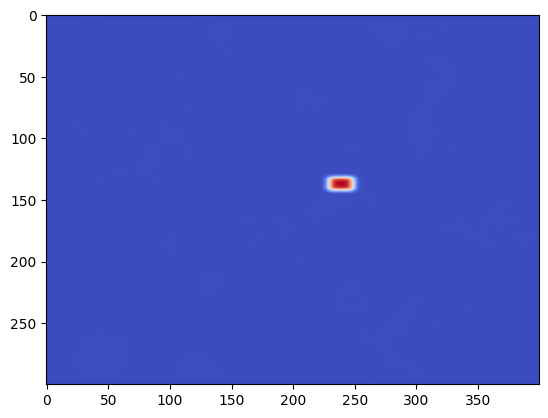

In [5]:
plt.imshow(agent.best.bl_det_image)

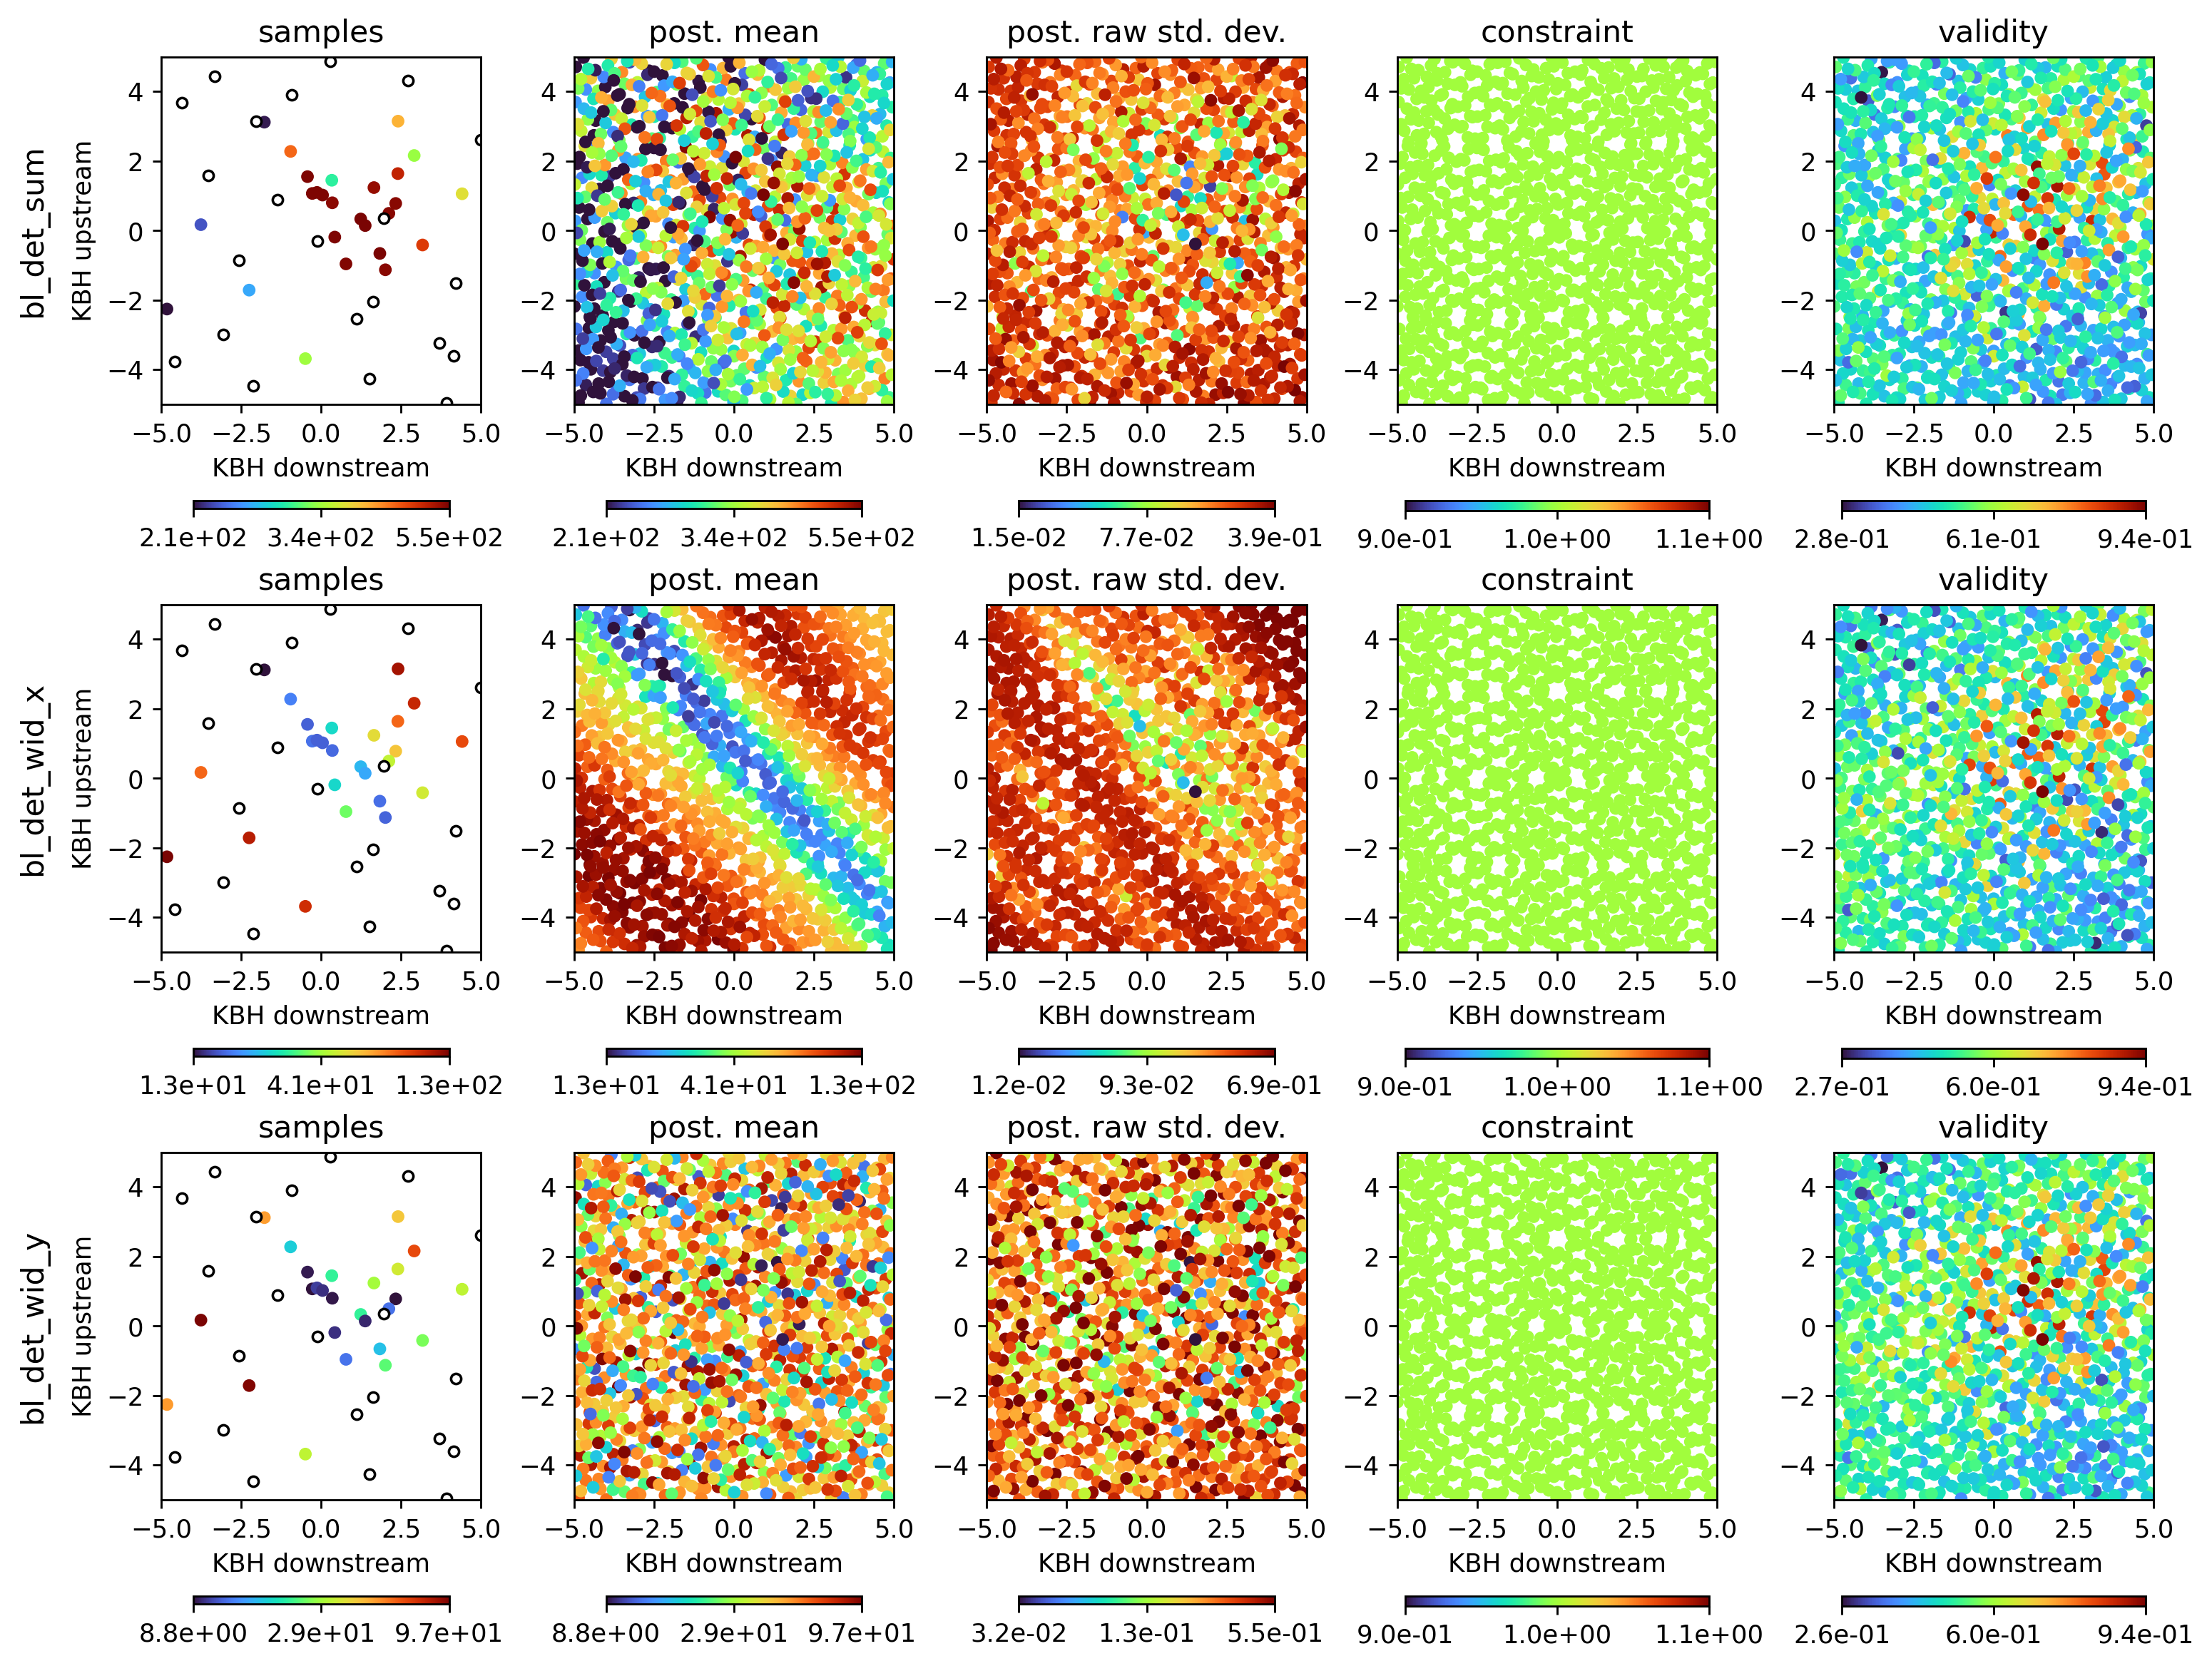

In [6]:
agent.plot_objectives(axes=(2, 3))